In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Carregar o DataFrame
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.width', 1000)        # Ajusta a largura para melhor visualização
pd.set_option('display.max_colwidth', 20)
df = pd.read_csv("TripA02.csv", sep=";", encoding="latin1")

def verificar_condicao_bateria(row):
    if row['Battery Voltage [V]'] < 12.0:
        return 0 
    elif row['Battery Temperature [°C]'] > 60.0:
        return 0 
    elif row['SoC [%]'] < 20.0:
        return 0 
    elif row['Battery Current [A]'] < -100 or row['Battery Current [A]'] > 100:
        return 0
   
    return 1 
df = df.loc[:, ~(df == 0).all()]
df['Condição'] = df.apply(verificar_condicao_bateria, axis=1)

correlation_matrix = df.corr()



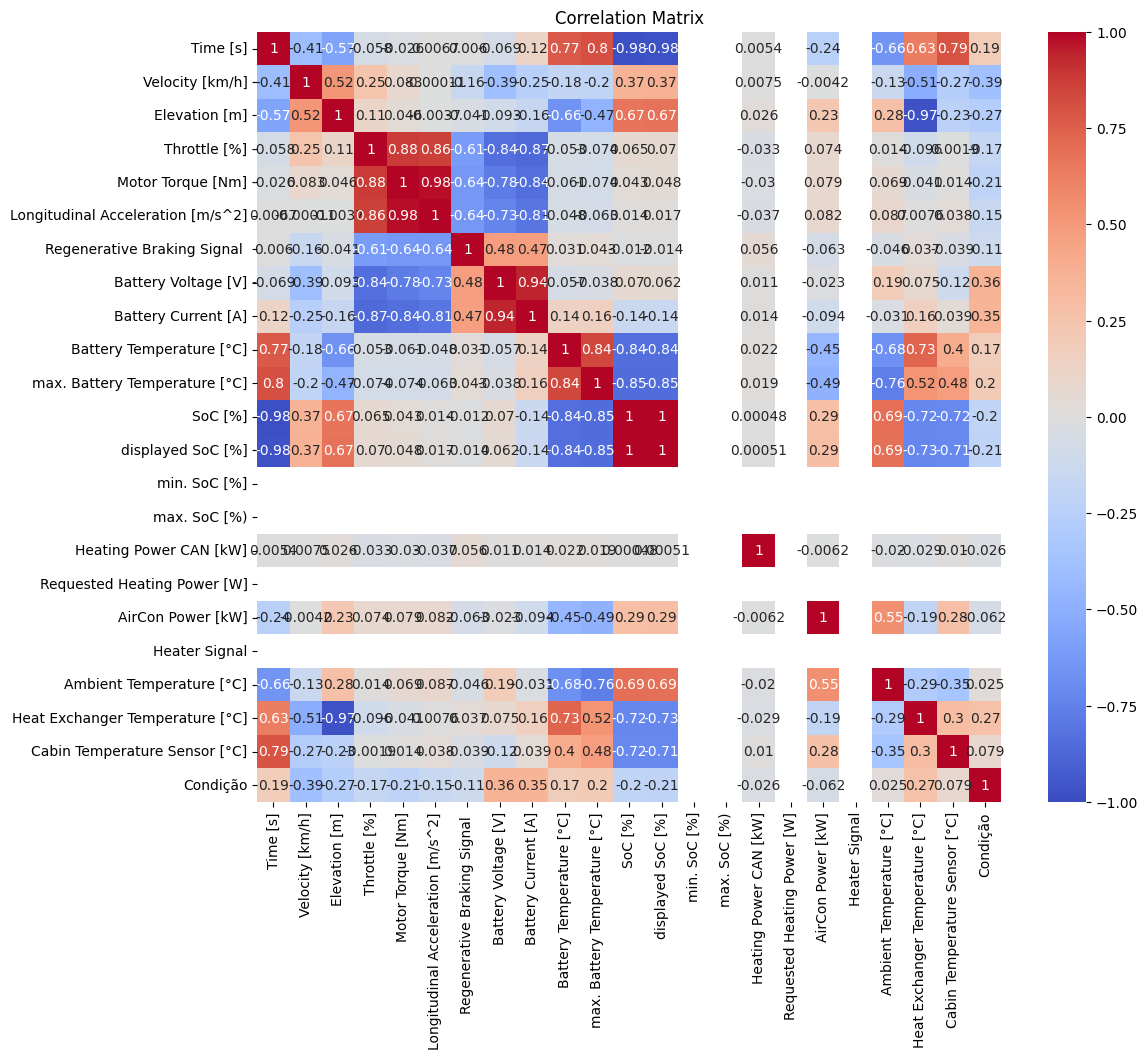

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt



# Criar o mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

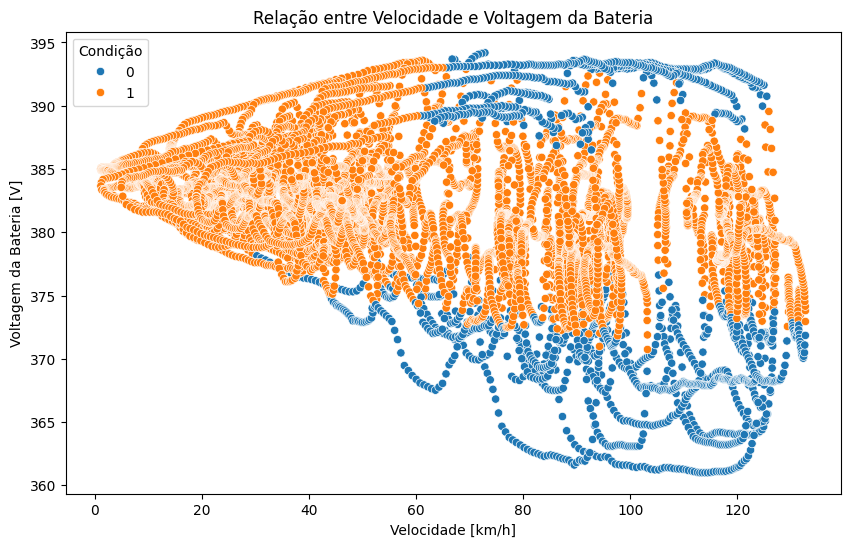

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Velocity [km/h]", y="Battery Voltage [V]", hue="Condição")  # Ajuste 'Condition' conforme seu DataFrame
plt.title('Relação entre Velocidade e Voltagem da Bateria')
plt.xlabel('Velocidade [km/h]')
plt.ylabel('Voltagem da Bateria [V]')
plt.show()

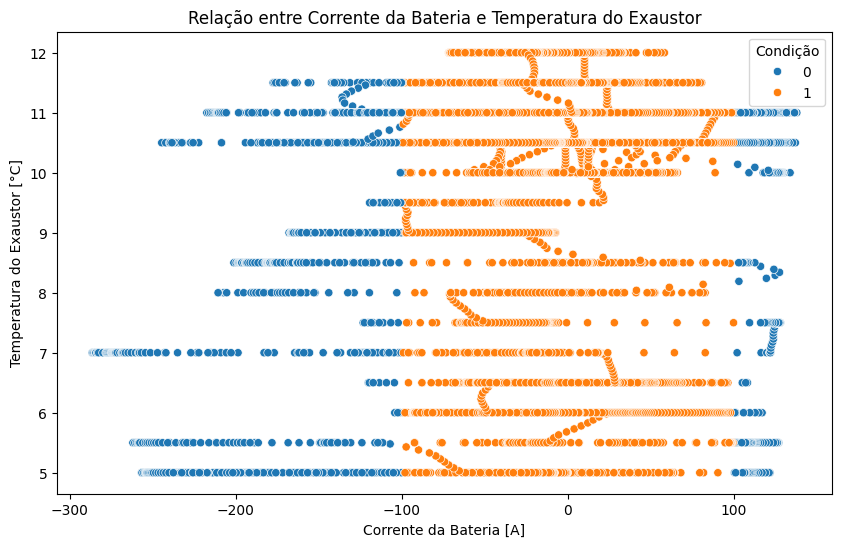

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Battery Current [A]", y="Heat Exchanger Temperature [°C]", hue="Condição")  # Ajuste 'Condition' conforme seu DataFrame
plt.title('Relação entre Corrente da Bateria e Temperatura do Exaustor')
plt.xlabel('Corrente da Bateria [A]')
plt.ylabel('Temperatura do Exaustor [°C]')
plt.show()

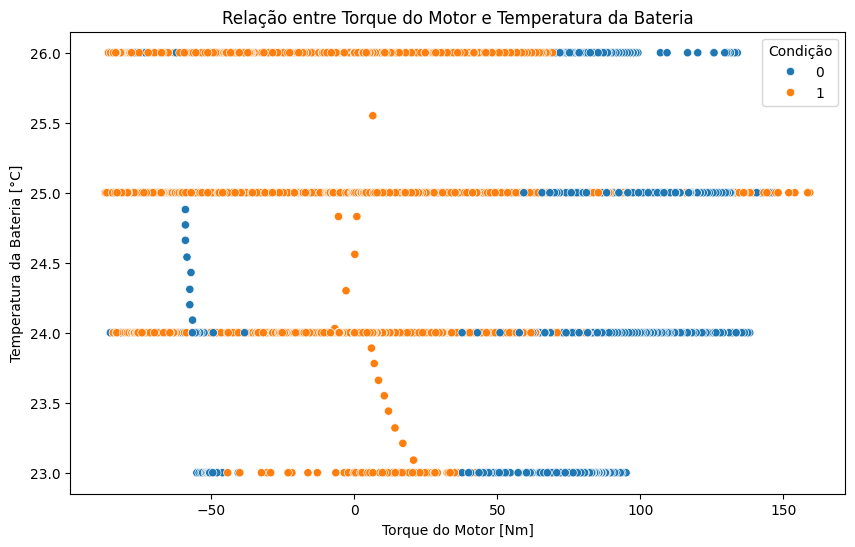

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Motor Torque [Nm]", y="Battery Temperature [°C]", hue="Condição")  # Ajuste 'Condition' conforme seu DataFrame
plt.title('Relação entre Torque do Motor e Temperatura da Bateria')
plt.xlabel('Torque do Motor [Nm]')
plt.ylabel('Temperatura da Bateria [°C]')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

x = df[["Velocity [km/h]", "Battery Voltage [V]", "Battery Current [A]", "Heat Exchanger Temperature [°C]", "Motor Torque [Nm]", "Battery Temperature [°C]"]]
y = df['Condição']   

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [45]:
y_predicoes = lda.predict(x_test) 

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [47]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=[0, 1])

<Figure size 1500x500 with 0 Axes>

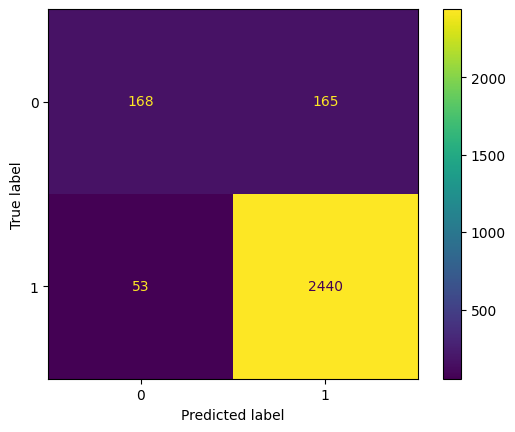

In [52]:
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=[0,1])
disp.plot(values_format='d') 

In [54]:
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.76      0.50      0.61       333
           1       0.94      0.98      0.96      2493

    accuracy                           0.92      2826
   macro avg       0.85      0.74      0.78      2826
weighted avg       0.92      0.92      0.92      2826



In [56]:
accuracy_score(y_true = y_test, y_pred = y_predicoes,) 

0.9228591648973815